In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_volume_air,inbtou_volume_cruise,inbtou_spending,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,,,
2010,4470000.0,4120000.0,350000.0,4.540000e+09,0,0,0.000000,2010
2011,4660000.0,4310000.0,350000.0,4.570000e+09,0,0,0.000000,2011
2012,4900000.0,4560000.0,340000.0,4.770000e+09,0,0,0.000000,2012
2013,5110000.0,4690000.0,420000.0,5.260000e+09,0,0,0.000000,2013
2014,5580000.0,5140000.0,440000.0,5.820000e+09,0,0,0.000000,2014
2015,6130000.0,5600000.0,530000.0,6.400000e+09,0,0,0.000000,2015
2016,6770000.0,5960000.0,810000.0,7.050000e+09,0,0,0.000000,2016
2017,7300000.0,6190000.0,1110000.0,7.460000e+09,0,0,0.000000,2017
2018,7550000.0,6570000.0,980000.0,7.860000e+09,0,0,0.000000,2018


Estimated COVID-19 effect: -4426638 ± 564465 (95% confidence)


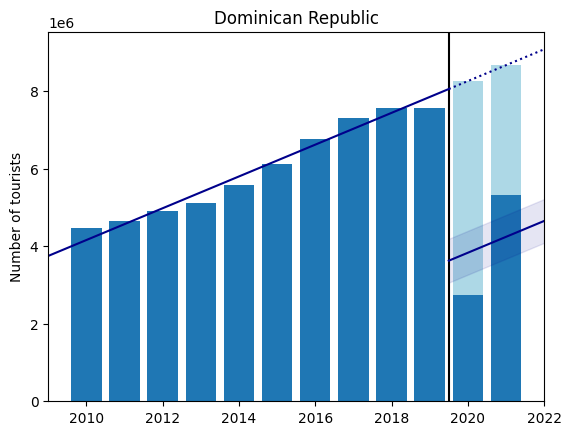

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     242.5
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           3.43e-08
Time:                        15:13:20   Log-Likelihood:                 25.597
No. Observations:                  12   AIC:                            -43.19
Df Residuals:                       8   BIC:                            -41.25
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -119

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
# Set up plot
plt.title('Dominican Republic')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -3530927 ± 565619 (95% confidence)


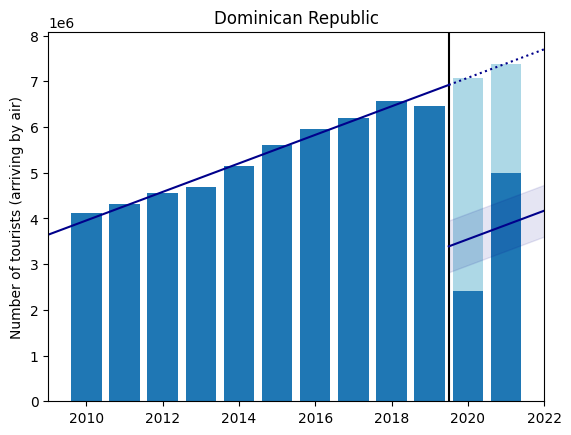

                              OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_air   R-squared:                       0.991
Model:                               OLS   Adj. R-squared:                  0.988
Method:                    Least Squares   F-statistic:                     307.6
Date:                   Wed, 26 Apr 2023   Prob (F-statistic):           1.34e-08
Time:                           15:13:38   Log-Likelihood:                 27.527
No. Observations:                     12   AIC:                            -47.05
Df Residuals:                          8   BIC:                            -45.11
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
# Set up plot
plt.title('Dominican Republic')
plt.ylabel('Number of tourists (arriving by air)')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume_air'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -895710 ± 126496 (95% confidence)


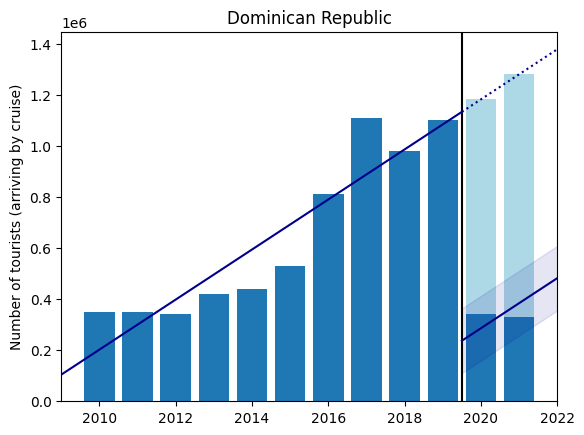

                               OLS Regression Results                               
Dep. Variable:     log_inbtou_volume_cruise   R-squared:                       0.919
Model:                                  OLS   Adj. R-squared:                  0.889
Method:                       Least Squares   F-statistic:                     30.33
Date:                      Wed, 26 Apr 2023   Prob (F-statistic):           0.000102
Time:                              15:15:37   Log-Likelihood:                 7.0415
No. Observations:                        12   AIC:                            -6.083
Df Residuals:                             8   BIC:                            -4.143
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# Set up plot
plt.title('Dominican Republic')
plt.ylabel('Number of tourists (arriving by cruise)')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume_cruise'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -4819638554 ± 479370807 (95% confidence)


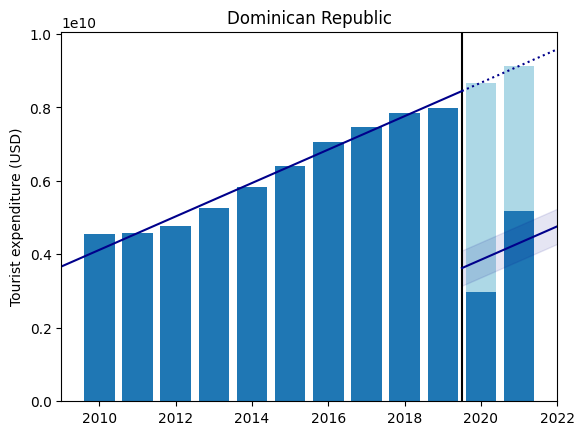

                             OLS Regression Results                            
Dep. Variable:     log_inbtou_spending   R-squared:                       0.987
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     199.8
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):           7.37e-08
Time:                         15:16:16   Log-Likelihood:                 24.379
No. Observations:                   12   AIC:                            -40.76
Df Residuals:                        8   BIC:                            -38.82
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
# Set up plot
plt.title('Dominican Republic')
plt.ylabel('Tourist expenditure (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)